In [78]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in google's mobility data
# mobility data source: Google LLC "Google COVID-19 Community Mobility Reports".
# https://www.google.com/covid19/mobility/ Accessed: 6/12/2020.
data = "https://raw.githubusercontent.com/ehuang13/w209_projects/master/Global_Mobility_Report.csv"
mobility_df = pd.read_csv(data, low_memory = False)

In [3]:
# check out the data
mobility_df.sample(10)

country_region_code country_region         sub_region_1  \
475333                  US  United States             Virginia   
176117                  SE         Sweden      Varmland County   
366065                  US  United States             Nebraska   
132449                 NaN        Namibia       Kavango Region   
429508                  US  United States       South Carolina   
51836                   FI        Finland     Southern Savonia   
436684                  US  United States            Tennessee   
132706                 NaN        Namibia        Oshana Region   
416076                  US  United States               Oregon   
508254                  VN        Vietnam  Bình Thuận Province   

             sub_region_2 iso_3166_2_code  census_fips_code        date  \
475333    Fauquier County             NaN           51061.0  2020-03-12   
176117                NaN            SE-S               NaN  2020-04-16   
366065    Saunders County             NaN           31155.0  2020-05-18   
132449                NaN           NA-OK               NaN  2020-02-28   
429508  Orangeburg County             NaN           45075.0  2020-02-25   
51836                 NaN           FI-04               NaN  2020-05-23   
436684       Giles County             NaN           47055.0  2020-02-25   
132706                NaN           NA-ON               NaN  2020-04-21   
416076   Multnomah County             NaN           41051.0  2020-05-05   
508254                NaN           VN-40               NaN  2020-04-23   

        retail_and_recreation_percent_change_from_baseline  \
475333                                               15.0    
176117                                              -15.0    
366065                                                NaN    
132449                                                NaN    
429508                                                8.0    
51836                                               -26.0    
436684                                                6.0    
132706                                                NaN    
416076                                              -39.0    
508254                                              -41.0    

        grocery_and_pharmacy_percent_change_from_baseline  \
475333                                               -2.0   
176117                                               -3.0   
366065                                                NaN   
132449                                                NaN   
429508                                               -2.0   
51836                                                22.0   
436684                                               -3.0   
132706                                              -18.0   
416076                                               -3.0   
508254                                              -29.0   

        parks_percent_change_from_baseline  \
475333                                 NaN   
176117                                30.0   
366065                                 NaN   
132449                                 NaN   
429508                                 NaN   
51836                                320.0   
436684                                 NaN   
132706                                 NaN   
416076                                56.0   
508254                               -29.0   

        transit_stations_percent_change_from_baseline  \
475333                                            NaN   
176117                                          -24.0   
366065                                            NaN   
132449                                            NaN   
429508                                            3.0   
51836                                           -26.0   
436684                                            6.0   
132706                                            NaN   
416076                                          -49.0   
508254                

### Simple EDA

In [4]:
print("Mobility data dimensions: {}".format(mobility_df.shape))

Mobility data dimensions: (516697, 13)


In [5]:
mobility_df.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [6]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
country_region_code                                   515810 non-null object
country_region                                        516697 non-null object
sub_region_1                                          501307 non-null object
sub_region_2                                          298720 non-null object
iso_3166_2_code                                       187299 non-null object
census_fips_code                                      298834 non-null float64
date                                                  516697 non-null object
retail_and_recreation_percent_change_from_baseline    400610 non-null float64
grocery_and_pharmacy_percent_change_from_baseline     385086 non-null float64
parks_percent_change_from_baseline                    238643 non-null float64
transit_stations_percent_change_from_baseline         275427 non-null float64
workplaces_percent_change_from_baseli

In [7]:
mobility_df.describe()

census_fips_code  retail_and_recreation_percent_change_from_baseline  \
count     298834.000000                                      400610.000000    
mean       30341.084840                                         -23.909084    
std        15299.099769                                          29.054157    
min         1001.000000                                        -100.000000    
25%        18111.000000                                         -44.000000    
50%        29101.000000                                         -21.000000    
75%        45059.000000                                           0.000000    
max        56045.000000                                         313.000000    

       grocery_and_pharmacy_percent_change_from_baseline  \
count                                      385086.000000   
mean                                           -6.876116   
std                                            21.812352   
min                                          -100.000000   
25%                                           -17.000000   
50%                                            -3.000000   
75%                                             6.000000   
max                                           337.000000   

       parks_percent_change_from_baseline  \
count                       238643.000000   
mean                            -5.895145   
std                             47.914222   
min                           -100.000000   
25%                            -38.000000   
50%                             -9.000000   
75%                             15.000000   
max                            616.000000   

       transit_stations_percent_change_from_baseline  \
count                                  275427.000000   
mean                                      -28.052304   
std                                        30.077850   
min                                      -100.000000   
25%                                       -52.000000   
50%                                       -26.000000   
75%                                        -3.000000   
max                                       497.000000   

       workplaces_percent_change_from_baseline  \
count                            503228.000000   
mean                                -24.191545   
std                                  21.692744   
min                                 -94.000000   
25%                                 -39.000000   
50%                                 -26.000000   
75%                                  -4.000000   
max                                 248.000000   

       residential_percent_change_from_baseline  
count                             284348.000000  
mean                                  10.976437  
std                                    9.470850  
min                                  -25.000000  
25%                                    2.000000  
50%                                   11.000000  
75%                                   17.000000  
max                                   56.000000

In [8]:
# quite a lot of null values...
mobility_df.isnull().sum()

country_region_code                                      887
country_region                                             0
sub_region_1                                           15390
sub_region_2                                          217977
iso_3166_2_code                                       329398
census_fips_code                                      217863
date                                                       0
retail_and_recreation_percent_change_from_baseline    116087
grocery_and_pharmacy_percent_change_from_baseline     131611
parks_percent_change_from_baseline                    278054
transit_stations_percent_change_from_baseline         241270
workplaces_percent_change_from_baseline                13469
residential_percent_change_from_baseline              232349
dtype: int64

In [9]:
# see top 10 countries with most data
mobility_df.groupby(["country_region"]).count().sort_values(by="country_region_code",ascending=False).head(10)

country_region_code  sub_region_1  sub_region_2  \
country_region                                                    
United States                304648        304534        298720   
United Kingdom                17260         17146             0   
Turkey                         9339          9225             0   
Puerto Rico                    7646          7532             0   
Vietnam                        7296          7182             0   
Slovenia                       5633          5519             0   
Japan                          5472          5358             0   
Romania                        4902          4788             0   
Nigeria                        4332          4218             0   
India                          4218          4104             0   

                iso_3166_2_code  census_fips_code    date  \
country_region                                              
United States              5814            298834  304648   
United Kingdom            16253                 0   17260   
Turkey                     9225                 0    9339   
Puerto Rico                   0                 0    7646   
Vietnam                    7182                 0    7296   
Slovenia                      0                 0    5633   
Japan                      5358                 0    5472   
Romania                    4788                 0    4902   
Nigeria                    4218                 0    4332   
India                      4104                 0    4218   

                retail_and_recreation_percent_change_from_baseline  \
country_region                                                       
United States                                              219426    
United Kingdom                                              16844    
Turkey                                                       8701    
Puerto Rico                                                  5074    
Vietnam                                                      7295    
Slovenia                                                     3007    
Japan                                                        5472    
Romania                                                      4896    
Nigeria                                                      3300    
India                                                        4104    

                grocery_and_pharmacy_percent_change_from_baseline  \
country_region                                                      
United States                                              207167   
United Kingdom                                              17031   
Turkey                                                       8561   
Puerto Rico                                                  5207   
Vietnam                                                      7060   
Slovenia                                                     2669   
Japan                                                        5472   
Romania                                                      4902   
Nigeria                                                      3268   
India                                                        4017   

                parks_percent_change_from_baseline  \
country_region                                       
United States                                77356   
United Kingdom                               13367   
Turkey                                        7918   
Puerto Rico                                   1776   
Vietnam                                       7254   
Slovenia                                       513   
Japan                                         5472   
Romania                                       4901   
Nigeria                                       2619   
India                                         4181   

                transit_stations_percent_change_from_baseline  \
country_region                                                  
United States                

### Deep dive into US mobility data

In [10]:
# filter mobility_df to united states
us = mobility_df["country_region"] == "United States"
us_df = mobility_df[us]

In [11]:
# rename columns
usCols = ['country_region_code', 'country_region', 'state', 'county', 'iso_3166_2_code', 'census_fips_code', 'date',
          'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
us_df.columns = usCols

In [12]:
us_df.sample(5)

country_region_code country_region     state           county  \
212069                  US  United States  Arkansas    Conway County   
279023                  US  United States   Indiana     Union County   
290109                  US  United States      Iowa  Woodbury County   
463467                  US  United States     Texas     Terry County   
328293                  US  United States  Michigan    Oceana County   

       iso_3166_2_code  census_fips_code        date  retail_and_recreation  \
212069             NaN            5029.0  2020-05-15                   -4.0   
279023             NaN           18161.0  2020-02-21                    NaN   
290109             NaN           19193.0  2020-05-25                  -10.0   
463467             NaN           48445.0  2020-04-12                    NaN   
328293             NaN           26127.0  2020-04-05                  -46.0   

        grocery_and_pharmacy  parks  transit_stations  workplaces  residential  
212069                   NaN    NaN               8.0       -22.0          NaN  
279023                   NaN    NaN               NaN         8.0          NaN  
290109                  -5.0    NaN             -30.0       -74.0         22.0  
463467                   NaN    NaN               NaN       -34.0          NaN  
328293                  17.0   13.0               NaN       -37.0          NaN

Mobility data by States

In [80]:
# which states has most mobility data
state_df = us_df.groupby(["state"], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

#rename columns
state_df.columns = ["state", "mobility_counts"]
state_df.head()

state  mobility_counts
43           Texas            22880
10         Georgia            16027
46        Virginia            14248
17        Kentucky            11259
33  North Carolina            11047

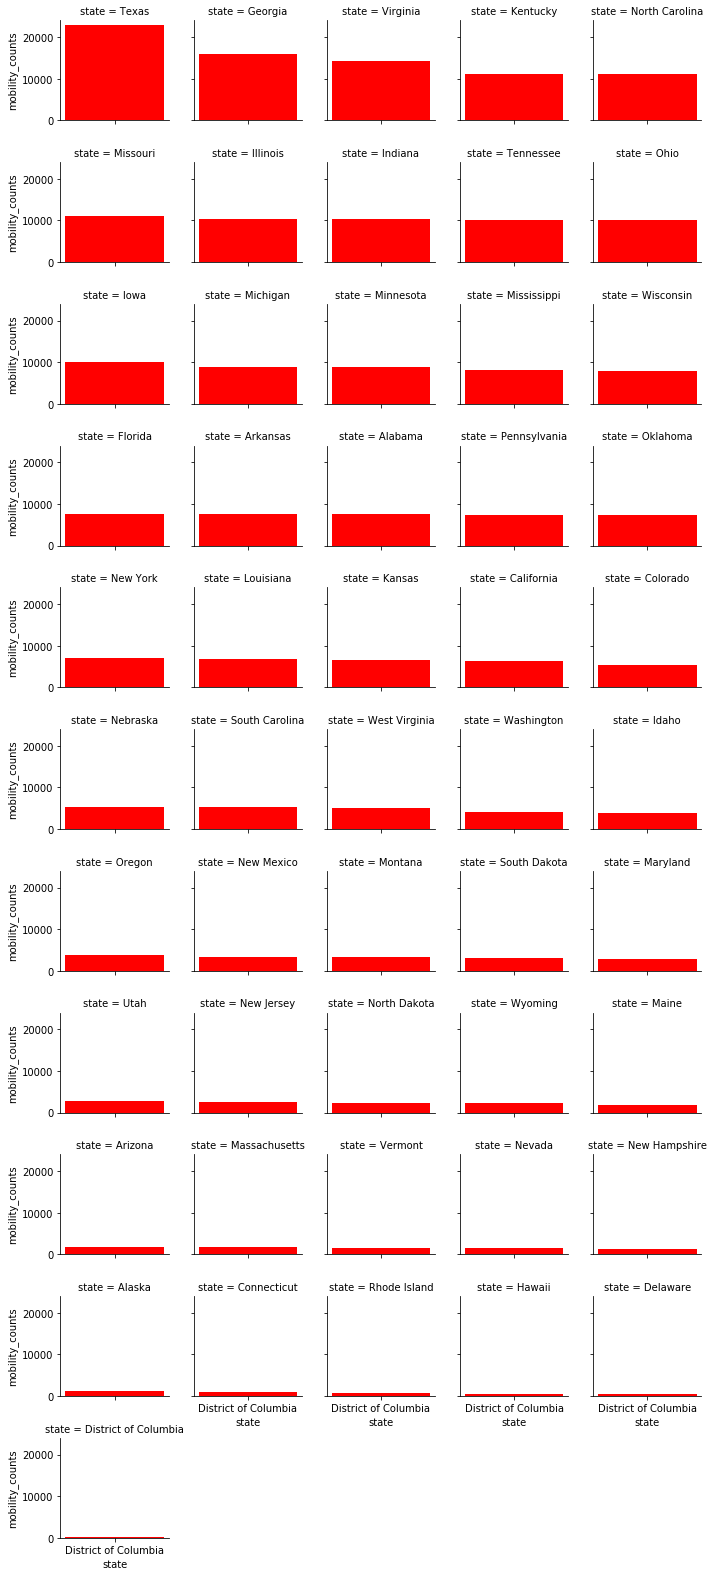

In [88]:
g = sns.FacetGrid(state_df, col="state", col_wrap=5, height=2)
g = g.map(plt.bar, "state", "mobility_counts", color="r")

Mobility data by locations

In [58]:
# group by locations to see which locations have the most mobility data
location_df = us_df.groupby(["country_region"]).count()
# location_df = us_df.groupby(['retail_and_recreation',
#        'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
#        'residential'], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

# transpose dataframe 
location_df = location_df.transpose()

# selection locations by count of data
location_df = location_df.loc[["retail_and_recreation", "grocery_and_pharmacy", "parks", "transit_stations", "workplaces", "residential"]].reset_index()

# rename columns
location_df.columns = ["location", "mobility_count"]

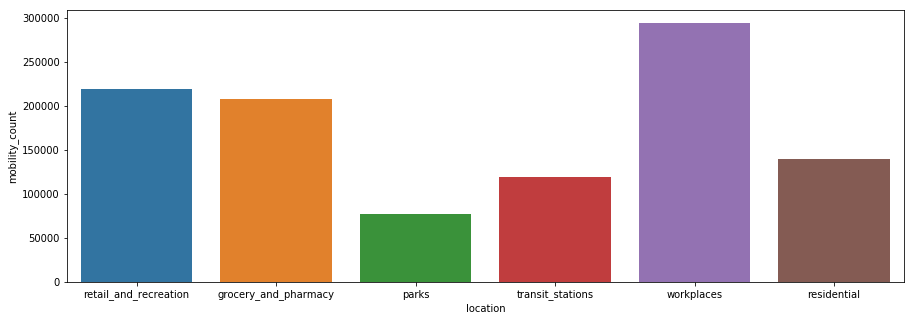

In [90]:
# plot location_df to see mobility data by location
plt.figure(figsize=(15,5))
ax = sns.barplot(x="location", y="mobility_count", 
                 data=location_df)